<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-файлов" data-toc-modified-id="Изучение-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение файлов</a></span></li><li><span><a href="#Проверка-целевого-признака" data-toc-modified-id="Проверка-целевого-признака-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка целевого признака</a></span></li><li><span><a href="#Сравнение-признаков" data-toc-modified-id="Сравнение-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Сравнение признаков</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-при-обработке" data-toc-modified-id="Концентрация-металлов-при-обработке-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов при обработке</a></span></li><li><span><a href="#Суммарная-концентрация" data-toc-modified-id="Суммарная-концентрация-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Суммарная концентрация</a></span></li><li><span><a href="#Распределение-размеров-гранул" data-toc-modified-id="Распределение-размеров-гранул-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Распределение размеров гранул</a></span></li></ul></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-sMAPE" data-toc-modified-id="Создание-функции-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание функции sMAPE</a></span></li><li><span><a href="#Определение-признаков" data-toc-modified-id="Определение-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Определение признаков</a></span></li><li><span><a href="#Обучение-модели--и-кросс-валидация" data-toc-modified-id="Обучение-модели--и-кросс-валидация-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение модели  и кросс-валидация</a></span></li><li><span><a href="#Проверка-модели-на-тестовых-данных" data-toc-modified-id="Проверка-модели-на-тестовых-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на тестовых данных</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Некобходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

План работы:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

### Изучение файлов

Импортируем все необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Прочитаем предоставленные данные и запишем их в отдельные датафреймы - обучающий, тестовый и общий.

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Пропущенных значений не так уж много, по каждому столбцу их менее 10%. Удалять не будем, исправим их на значения из предыдущих строк, аргументируя тем, что такое значение будет ближе к пропущенному по значению, чем значение из предыдущей недели, месяца и так далее.

In [3]:
data_train = data_train.ffill(None)

### Проверка целевого признака

Проверим правильно ли рассчитана эффективность обогащения, используя формулу сравним со столбцом `rougher.output.recovery`

In [4]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [5]:
values = []
data_train['values'] = ((C * (F - T)) / (F * (C - T)) *100 )
data_train['values']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: values, Length: 14149, dtype: float64

In [6]:
pred = data_train['values']
target = data_train['rougher.output.recovery']

mae = mean_absolute_error(target, pred)
mae

9.73512347450521e-15

Что ж, величина получилась крайне маленькая, значит с данными в таблице все более менее в порядке.

In [7]:
data_train = data_train.drop('values', axis=1)

### Сравнение признаков

Сравним датафреймы по количеству признаков.

In [8]:
print(data_train.shape)
print(data_test.shape)
data_full.shape

(14149, 87)
(5290, 53)


(19439, 87)

In [9]:
column = set(data_train.columns) - set(data_test.columns)
data_train[column].head()

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.tail_au,rougher.output.tail_ag,rougher.calculation.floatbank11_sulfate_to_au_feed,final.output.recovery,primary_cleaner.output.concentrate_au,final.output.tail_ag,final.output.concentrate_ag,final.output.tail_sol,...,rougher.output.tail_au,final.output.concentrate_pb,final.output.concentrate_au,rougher.calculation.au_pb_ratio,final.output.tail_pb,secondary_cleaner.output.tail_sol,rougher.output.tail_pb,primary_cleaner.output.tail_sol,rougher.output.concentrate_sol,rougher.output.concentrate_ag
0,8.547551,10.389648,2.106679,5.008018,3520.337158,70.541216,34.174427,10.411962,6.055403,16.904297,...,1.170244,9.889648,42.192020,2.838687,0.895447,8.764648,0.508728,7.476074,28.029297,11.500771
1,8.558743,10.497069,2.353017,4.955378,3489.981857,69.266198,34.118526,10.462676,6.029369,16.634514,...,1.184827,9.968944,42.701629,2.858998,0.927452,9.001494,0.536689,6.733907,28.067063,11.615865
2,8.603505,10.354494,2.416800,4.843460,3502.359819,68.116445,33.969464,10.507046,6.055926,16.208849,...,1.162562,10.213995,42.657501,2.945989,0.953716,8.842896,0.546416,6.471768,27.454037,11.695753
3,7.221879,8.496563,2.262051,4.655288,3499.162912,68.347543,28.260743,10.422762,6.047977,16.532835,...,1.079755,9.977019,42.689819,3.002340,0.883763,9.122857,0.542525,6.843791,27.341277,11.915047
4,9.089428,9.986786,2.277073,4.552800,3506.679315,66.927016,33.044932,10.360302,6.148599,16.525686,...,1.012642,10.142511,42.774141,3.169615,0.792826,8.871028,0.515438,6.550154,27.041023,12.411054


Предположу, что это признаки, которые могут стать утечкой при обучении модели. Выходные значения металлов, после производимых операций, их концентрация и размер.

Из обучающего фрейма, необходимо удалить столбцы, которых нет в тестовом. Так как смысла обучать модель тому, что не пригодится - нет, она будет работать неккоректно. Сделаем это уже перед обучением модели.

## Анализ данных

### Концентрация металлов при обработке

Посмотрим как меняется распределение металлов на разных этапах обработки.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

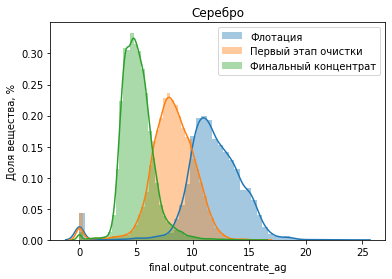

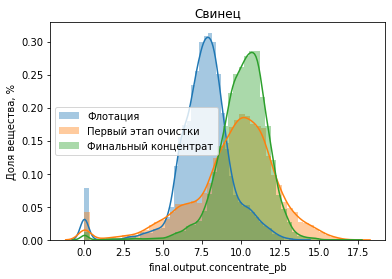

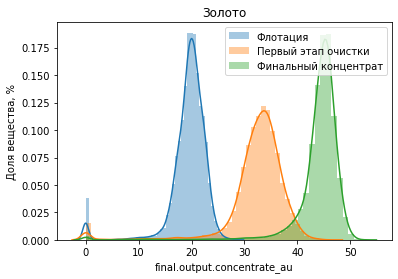

In [10]:
def plot(rougher, primary, final, name):
    f, ax = plt.subplots(1, 1)
    sns.distplot(data_train[rougher], label = 'Флотация',ax=ax)
    sns.distplot(data_train[primary], label = 'Первый этап очистки',ax=ax)
    sns.distplot(data_train[final], label = 'Финальный концентрат',ax=ax)
    ax.legend()
    plt.title(name)
    plt.ylabel('Доля вещества, %')
    
plot('rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'Серебро')
plot('rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb', 'Свинец')
plot('rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 'Золото')

Из графиков видно, что серебро, как ему и положено уменьшается, ведь мы преследуем цель увеличения концентрации золота. Свинец распределен более равномерно. Золото же наоборот увеличивает свою долю, можно убедиться, что все работает как и нужно.

### Суммарная концентрация

Теперь посмотрим как распределенны ВСЕ вещества в сумме.

38.88032491727404
50.15629580032781
59.27856030405919


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'Доля веществ, %')

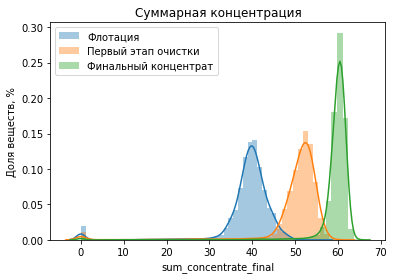

In [11]:
data_train['sum_concentrate_rougher'] = \
data_train.loc[:, ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']].sum(axis=1)
print(data_train['sum_concentrate_rougher'].mean())

data_train['sum_concentrate_primary_cleaner'] = \
data_train.loc[:, ['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au']].sum(axis=1)
print(data_train['sum_concentrate_primary_cleaner'].mean())

data_train['sum_concentrate_final'] = \
data_train.loc[:, ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au']].sum(axis=1)
print(data_train['sum_concentrate_final'].mean())

f, ax = plt.subplots(1, 1)
sns.distplot(data_train['sum_concentrate_rougher'], label = 'Флотация',ax=ax)
sns.distplot(data_train['sum_concentrate_primary_cleaner'], label = 'Первый этап очистки',ax=ax)
sns.distplot(data_train['sum_concentrate_final'], label = 'Финальный концентрат',ax=ax)
ax.legend()
plt.title('Суммарная концентрация')
plt.ylabel('Доля веществ, %')

Здесь можно наблюдать как после всех этапов очистки общая концентрация становится все более усредненной.

In [12]:
data_train = data_train.drop(['sum_concentrate_rougher', 'sum_concentrate_primary_cleaner', 'sum_concentrate_final'], axis=1)
data_train.shape

(14149, 87)

На графиках очень много нулевых значений, можно считать их выбросами, избавимся от всех строк в которых хоть один из элементов принимает такое низкое значение, они неккоректны.

In [13]:
col_with_conc = []
for column in data_train.columns:
    if 'output.concentrate' in column:
        col_with_conc.append(column)
col_with_conc

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [14]:
for column in col_with_conc:
    data_train = data_train[data_train[column] > .01]
    
data_train.shape

(13592, 87)

### Распределение размеров гранул

Проверим, как распределены значения размеров гранул в тренировочном и тестововм датасетах, построим графики.

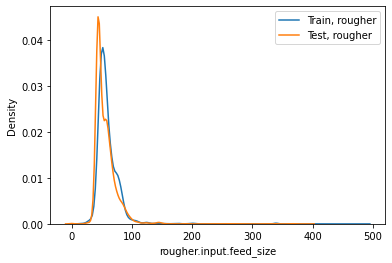

In [15]:
f, ax = plt.subplots(1, 1)
sns.kdeplot(data_train['rougher.input.feed_size'], label='Train, rougher', ax=ax)
sns.kdeplot(data_test['rougher.input.feed_size'], label='Test, rougher', ax=ax)
ax.legend()

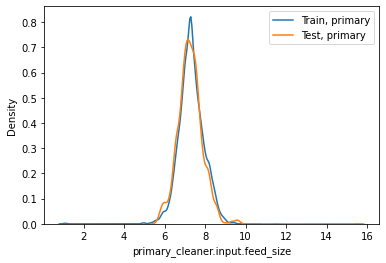

In [16]:
f, ax = plt.subplots(1, 1)
sns.kdeplot(data_train['primary_cleaner.input.feed_size'], label='Train, primary', ax=ax)
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], label='Test, primary', ax=ax)
ax.legend()

Здесь все в порядке.

## Построение модели

### Создание функции sMAPE

In [17]:
def smape(targ, pred): 
    error = np.abs(targ - pred) 
    scale = (np.abs(targ) + np.abs(pred)) / 2
    return np.mean(error / scale) * 100 

def total_smape(rougher, final):
    result = rougher*.25 + final*.75
    return result

Создадим скорер, благодаря которому будем подбирать параметры, интересуемый нас результат - чем меньше, тем лучше.

In [18]:
smape_scorer = make_scorer(smape, greater_is_better=False)

### Определение признаков

Оставим только те столбцы, которые есть в тестовой выборке, предварительно определим целевые признаки.

In [19]:
target_rougher = data_train['rougher.output.recovery']
target_final = data_train['final.output.recovery']

data_train = data_train.loc[:,data_test.columns]

features = data_train.drop('date', axis=1)
target_rougher.shape, target_final.shape, features.shape

((13592,), (13592,), (13592, 52))

### Обучение модели  и кросс-валидация

С помощью GridSearchCV подберем идеальные гиперпараметры и посчитаем sMAPE для случайного леса и древа решений, не забудем указать наш скорер.

In [20]:
parametrs = {'max_depth': range(1,20, 2)}
model = DecisionTreeRegressor(random_state=12345)
grid = GridSearchCV(model, parametrs, smape_scorer)

grid.fit(features, target_rougher)
best_tree_rougher = grid.best_estimator_
scores_rougher = grid.best_score_
print('Лучшая модель для rougher:', best_tree_rougher)
print('Rougher sMAPE', scores_rougher)

grid.fit(features, target_final)
best_tree_final = grid.best_estimator_
scores_final = grid.best_score_
print('Лучшая модель для final:', best_tree_final)
print('Final sMAPE:', scores_final)

print('Итоговое sMAPE:', total_smape(scores_rougher, scores_final))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass scoring=make_scorer(smape, greater_is_better=False) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Лучшая модель для rougher: DecisionTreeRegressor(max_depth=3, random_state=12345)
Rougher sMAPE -6.816626954927381
Лучшая модель для final: DecisionTreeRegressor(max_depth=3, random_state=12345)
Final sMAPE: -9.219772143970484
Итоговое sMAPE: -8.618985846709709


Проделаем то же самое со случайным лесом.

In [21]:
parametrs = {'max_depth': range(1,20, 4),
             'n_estimators': range(1,100, 20)}
model = RandomForestRegressor(random_state=12345)
grid = GridSearchCV(model, parametrs, smape_scorer)

grid.fit(features, target_rougher)
best_forest_rougher = grid.best_estimator_
scores_rougher = grid.best_score_
print('Лучшая модель для rougher', best_forest_rougher)
print('Rougher sMAPE:', scores_rougher)

grid.fit(features, target_final)
best_forest_final = grid.best_estimator_
scores_final = grid.best_score_
print('Лучшая модель для final:', best_forest_final)
print('Final sMAPE:', scores_final)

print('Итоговое sMAPE:', total_smape(scores_rougher, scores_final))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass scoring=make_scorer(smape, greater_is_better=False) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Лучшая модель для rougher RandomForestRegressor(max_depth=5, n_estimators=81, random_state=12345)
Rougher sMAPE: -6.378609189329682
Лучшая модель для final: RandomForestRegressor(max_depth=5, n_estimators=81, random_state=12345)
Final sMAPE: -9.031092767027328
Итоговое sMAPE: -8.367971872602917


Теперь пришла очередь линейной регрессии.

In [22]:
model = LinearRegression()
scores_rougher = cross_val_score(model, features, target_rougher, scoring=smape_scorer).mean()
scores_final = cross_val_score(model, features, target_final, scoring=smape_scorer).mean()
print('Rougher smape:',  scores_rougher)
print('Final smape:',  scores_final)
print('Итоговое smape:', total_smape(scores_rougher, scores_final))

Rougher smape: -7.270673184186526
Final smape: -10.995311438260142
Итоговое smape: -10.064151874741738


Лучший результат показал случайный лес - 8.37% ошибок.

### Проверка модели на тестовых данных

Добавим в тестовую выборку таргеты, определив date как индекс.

In [23]:
data_test = data_test.ffill(None)

In [24]:
data_test = data_test.set_index('date')
data_full = data_full.set_index('date')
data_test = data_test.merge(data_full[['rougher.output.recovery', 'final.output.recovery']], on = 'date', how='left')
data_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


Перенанзначим признаки для теста.

In [25]:
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_rougher_test = data_test['rougher.output.recovery']
target_final_test = data_test['final.output.recovery']
target_rougher_test.shape, target_final_test.shape, features_test.shape

((5290,), (5290,), (5290, 52))

Проверим какую sMAPE покажет наша модель на тесте

In [26]:
pred_rougher = best_forest_rougher.predict(features_test)
smape_rougher = smape(target_rougher_test, pred_rougher)
pred_final = best_forest_final.predict(features_test)
smape_final = smape(target_final_test, pred_final)
print(smape_rougher)
print(smape_final)
print(total_smape(smape_rougher, smape_final))

8.129649569540504
9.72191655144335
9.323849805967638


Теперь сравним ее со "случайной" моделью.

In [27]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features, target_rougher)
pred_rougher = dummy_clf.predict(features_test)
smape_rougher = smape(target_rougher_test, pred_rougher)
pred_final = best_forest_final.predict(features_test)
smape_final = smape(target_final_test, pred_final)
print(smape_rougher)
print(smape_final)
print(total_smape(smape_rougher, smape_final))

9.985912565459811
9.72191655144335
9.787915554947466


Наша машина ненамного превосходит константную, есть к чему стремиться!

## Общий вывод

В этом проекте мы разрабатывали модель способную предсказывать окончательное количество золото в руде исходя из данных прочих металлов. 

В результате проделанной работы мы провели анализ предоставленных данных:
- пропуски были заменены на значения из предыдущих операций, ближайших по времени;
- от нулевых значений было решено избавиться, так как скорее всего такие данные являлись ошибочными.

Также мы построили графики распределений величин:
- сравнили какую долю занимают металлы на всех этапах обработки;
- проверили, что данные распределены одинаково относительно тренировочной и тестовой выборок. 

Однотипные задачи были выполнены с помощью функций и циклов, подборкой лучших гиперпараметров и моделей занимался GridSearch, чем мы значительно облегчили себе работу. Выбрав лучшую модель мы проестировали ее на отдельной выборке и получили результат sMAPE = 9.32%, такой результат оказался ненамного выше случайной модели. 

Запускать ли такую машину ради дополнительных 0,4% точности - решение за заказчиком.